In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
np.random.seed(24141)
rnd_st = 2314231

In [3]:
plt.rcParams["figure.figsize"] = (12,6)

# Carga de datos

## Diccionarios / Mapeadores

In [4]:
breed = pd.read_csv('data/breed_labels.csv')
color = pd.read_csv('data/color_labels.csv')
state = pd.read_csv('data/state_labels.csv')

In [5]:
breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [6]:
color.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [7]:
state.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


## Train and Test Datasets

In [8]:
train_df = pd.read_csv('data/train.csv')
test_df   = pd.read_csv('data/test.csv')
print(train_df.shape, test_df.shape)

(10582, 20) (4411, 19)


In [9]:
train_df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,Nibble is a 3+ month old ball of cuteness. He ...,2,0
1,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,"Good guard dog, very alert, active, obedience ...",2,3
2,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,This handsome yet cute boy is up for adoption....,2,4
3,2,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,This is a stray kitten that came to my house. ...,2,5
4,2,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,anyone within the area of ipoh or taiping who ...,1,6


In [10]:
test_df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,PID
0,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,I just found it alone yesterday near my apartm...,1
1,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,Their pregnant mother was dumped by her irresp...,2
2,1,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,Siu Pak just give birth on 13/6/10 to 6puppies...,7
3,2,12,265,0,2,1,7,0,2,2,3,3,3,1,1,0,41326,"Very manja and gentle stray cat found, we woul...",9
4,2,3,264,0,2,1,2,5,3,3,1,1,2,1,1,50,41326,Kali is a super playful kitten who is on the g...,11


In [11]:
del train_df
del test_df

# Mapeo de datos 

In [12]:
def transform_data(train_data_fname, test_data_fname, get_dummies=False):
    def transform_columns(df):
        df = df.drop(["Description"], axis=1)
        df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
        df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
        df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
        df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
        df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
        df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
        df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
        df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
        df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        return df
    
    df_train = pd.read_csv(train_data_fname)
    df_train = transform_columns(df_train)
    df_test = pd.read_csv(test_data_fname)
    df_test = transform_columns(df_test)
        
    #
    df = pd.concat([df_train, df_test], sort=True)

    # set dummy variables for everything
    # except from Age, Quantity, Fee
    if get_dummies:
        num_cols = [k for k,v in df.dtypes.items() if v == "int64" and k != "PID"]
        df = pd.get_dummies(df)
        
    # get train and test back
    n = len(df_train)
    if get_dummies:
        from sklearn.preprocessing import StandardScaler
        df[num_cols] = StandardScaler().fit_transform(df[num_cols])
    
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    df_train.AdoptionSpeed = df_train.AdoptionSpeed.astype("category")
    
    return df_train, df_test
    #y = df_train['AdoptionSpeed']
    #X = df_train.drop('AdoptionSpeed', axis=1)
    #yy = None
    #XX = df_test.drop('AdoptionSpeed', axis=1)

    #return X, y, XX, yy

In [13]:
#X_train, y_train, XX_test, yy_test = transform_data("data/train.csv", "data/test.csv")

# Carga de Datos

In [14]:
df_train, df_test = transform_data("data/train.csv", "data/test.csv")

/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
df_train.AdoptionSpeed = df_train.AdoptionSpeed.astype("category")

In [16]:
df_train.dtypes

AdoptionSpeed    category
Age                 int64
Breed1             object
Breed2             object
Color1             object
Color2             object
Color3             object
Dewormed           object
Fee                 int64
FurLength          object
Gender             object
Health             object
MaturitySize       object
PID                 int64
Quantity            int64
State               int64
Sterilized         object
Type               object
Vaccinated         object
dtype: object

# Visualizacion de Datos

In [17]:
[(col, tp) for col, tp in zip(df_train.columns, df_train.dtypes)]

[('AdoptionSpeed',
  CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0], ordered=False)),
 ('Age', dtype('int64')),
 ('Breed1', dtype('O')),
 ('Breed2', dtype('O')),
 ('Color1', dtype('O')),
 ('Color2', dtype('O')),
 ('Color3', dtype('O')),
 ('Dewormed', dtype('O')),
 ('Fee', dtype('int64')),
 ('FurLength', dtype('O')),
 ('Gender', dtype('O')),
 ('Health', dtype('O')),
 ('MaturitySize', dtype('O')),
 ('PID', dtype('int64')),
 ('Quantity', dtype('int64')),
 ('State', dtype('int64')),
 ('Sterilized', dtype('O')),
 ('Type', dtype('O')),
 ('Vaccinated', dtype('O'))]

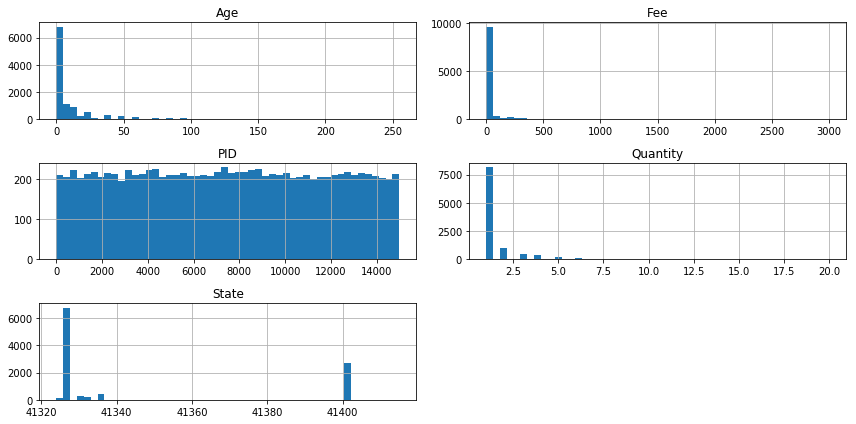

In [18]:
df_train.hist(bins=50)
plt.tight_layout()

/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


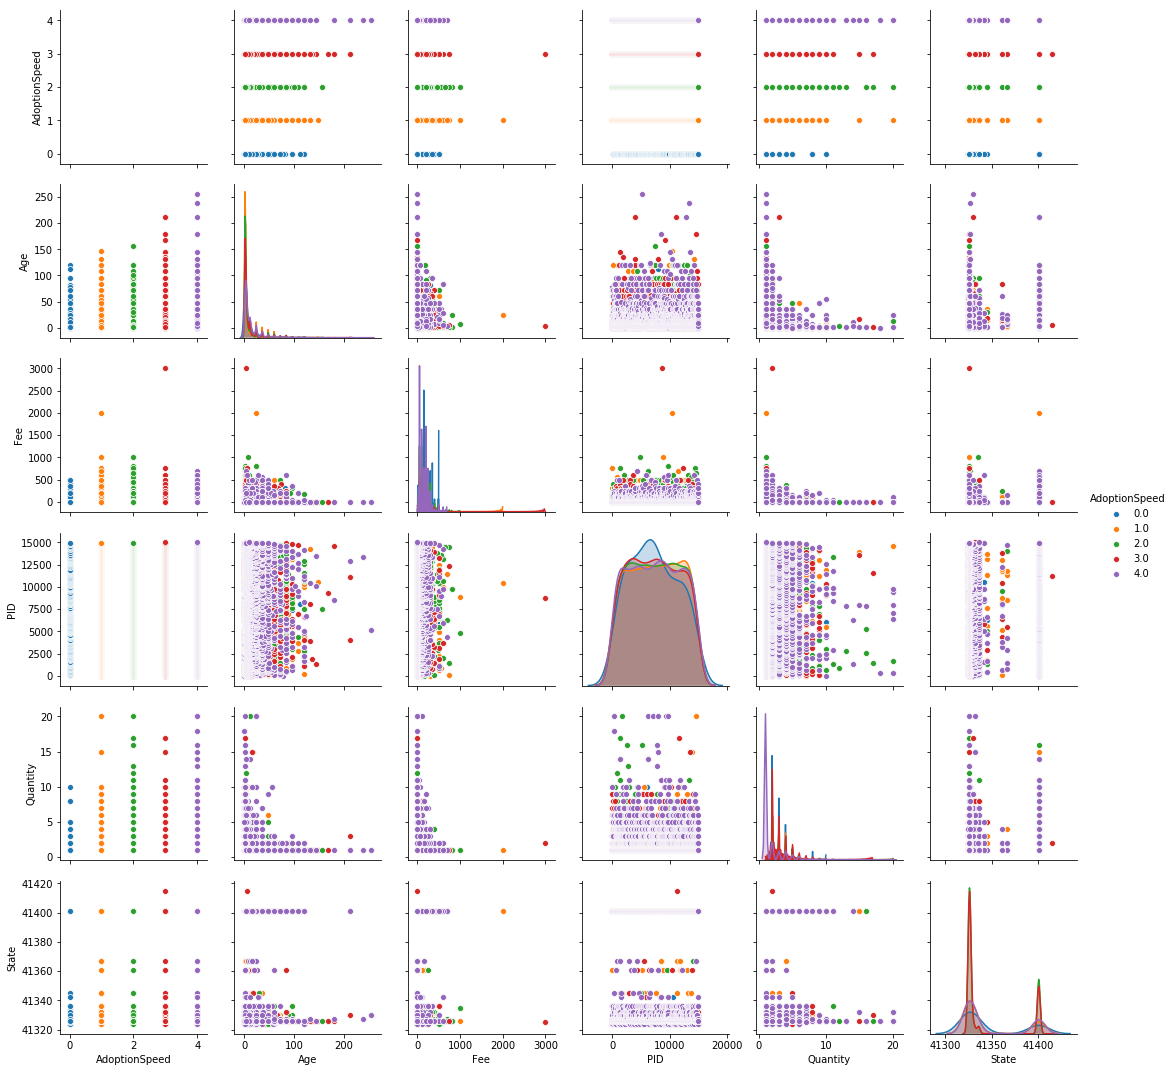

In [19]:
sns.pairplot(df_train, hue="AdoptionSpeed")

## Abortin Speed

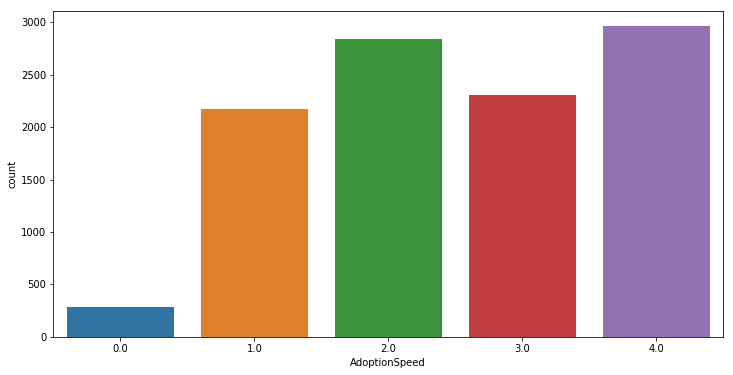

In [20]:
sns.countplot(x="AdoptionSpeed", data=df_train)

In [21]:
df_train["AdoptionSpeed"].value_counts() / df_train.shape[0]

4.0    0.280098
2.0    0.268947
3.0    0.218295
1.0    0.205727
0.0    0.026933
Name: AdoptionSpeed, dtype: float64

## Age

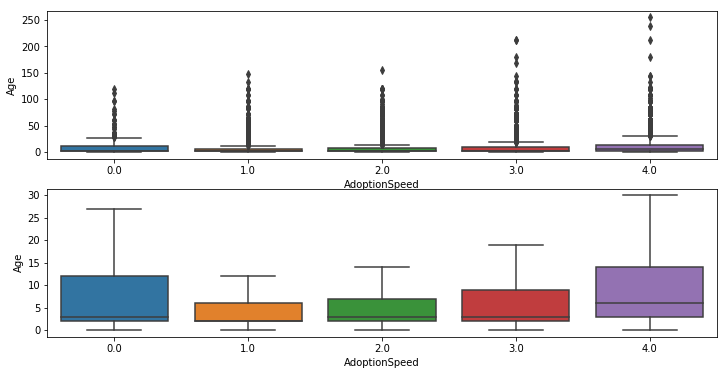

In [22]:
f, (ax1, ax2) = plt.subplots(2,1)
sns.boxplot(x="AdoptionSpeed", y="Age", data=df_train, ax=ax1)
sns.boxplot(x="AdoptionSpeed", y="Age", data=df_train, ax=ax2, showfliers=False)

(0, 150)

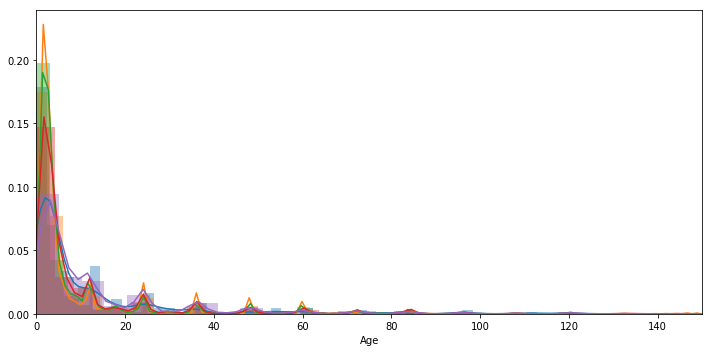

In [23]:
_, bins = np.histogram(df_train["Age"])
g = sns.FacetGrid(df_train, hue="AdoptionSpeed", height=5, aspect=2, despine=False)
g.map(sns.distplot, "Age", bins=50)
plt.xlim([0,150])

## Fee

In [24]:
variable = "Fee"

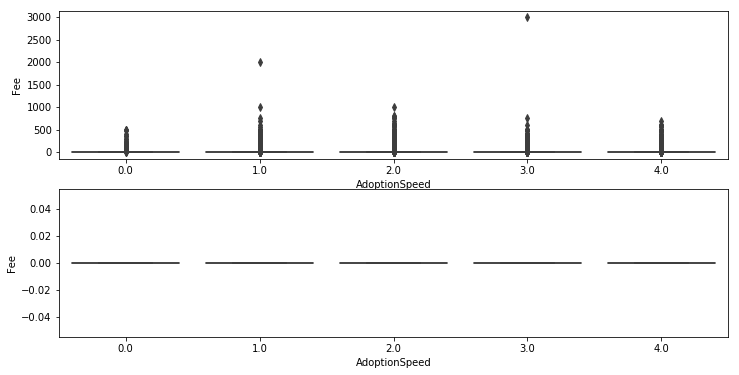

In [25]:
f, (ax1, ax2) = plt.subplots(2,1)
sns.boxplot(x="AdoptionSpeed", y=variable, data=df_train, ax=ax1)
sns.boxplot(x="AdoptionSpeed", y=variable, data=df_train, ax=ax2, showfliers=False)

(0, 500)

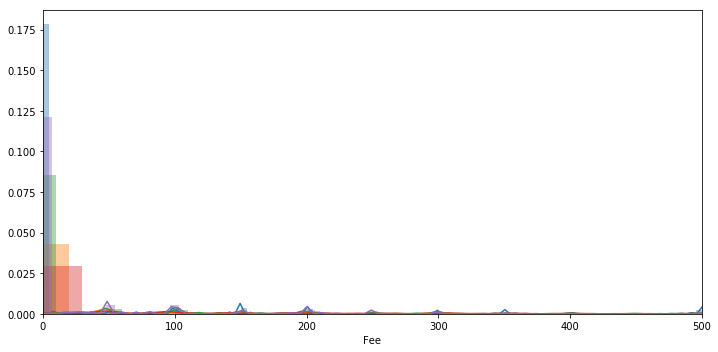

In [26]:
_, bins = np.histogram(df_train[variable])
g = sns.FacetGrid(df_train, hue="AdoptionSpeed", height=5, aspect=2, despine=False)
g.map(sns.distplot, variable, bins=100)
plt.xlim([0,500])

## Dewormed


### Useful Function

In [27]:
df_train["Dewormed"].value_counts().index

Index(['T', 'F', 'N/A'], dtype='object')

In [28]:
def useful_plots(x=None, y="Age", data=None, showfliers=False):
    f, axs = plt.subplots(3,1, figsize=(15,10))
    order = data[x].value_counts().iloc[:10].index
    sns.countplot(x=x, data=data, ax=axs[0], order=order)
    plt.grid()
    sns.countplot(x="AdoptionSpeed", data=data, hue=x, ax=axs[1], hue_order=order)
    #sns.boxplot(x="AdoptionSpeed", y=y, data=data, hue=x, ax=axs[2], showfliers=showfliers)

    table = pd.crosstab(data["AdoptionSpeed"],data[x], normalize="index", 
                        margins=True)
    # Putting columns in the same order as previous plots
    table[order].plot(kind="bar",ax=axs[2])
    
    for ax in axs:
        ax.grid()
    
    if len(order) > 5:
        axs[1].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
        axs[2].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


In [29]:
def useful_plots(x=None, y="Age", data=None, showfliers=False):
    f, axs = plt.subplots(3,1, figsize=(15,10))
    order = data[x].value_counts().iloc[:10].index
    sns.countplot(x=x, data=data, ax=axs[0], order=order)
    plt.grid()
    sns.countplot(x="AdoptionSpeed", data=data, hue=x, ax=axs[1], hue_order=order)
    #sns.boxplot(x="AdoptionSpeed", y=y, data=data, hue=x, ax=axs[2], showfliers=showfliers)

    
    target = "AdoptionSpeed"
    type_probs = data.groupby(target).size().div(len(data))
    cond_probs = data.groupby([target, x]).size().div(len(data))\
                     .div(type_probs, axis=0, level=target)

    sns.barplot(x=target, hue=x, y=0, data=cond_probs.reset_index(), hue_order=order)
    #table = pd.crosstab(data["AdoptionSpeed"],data[x], normalize="index", 
    #                    margins=True)
    # Putting columns in the same order as previous plots

    
    
    #table[order].plot(kind="bar",ax=axs[2])
    
    for ax in axs:
        ax.grid()
    
    if len(order) > 5:
        axs[1].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
        axs[2].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)



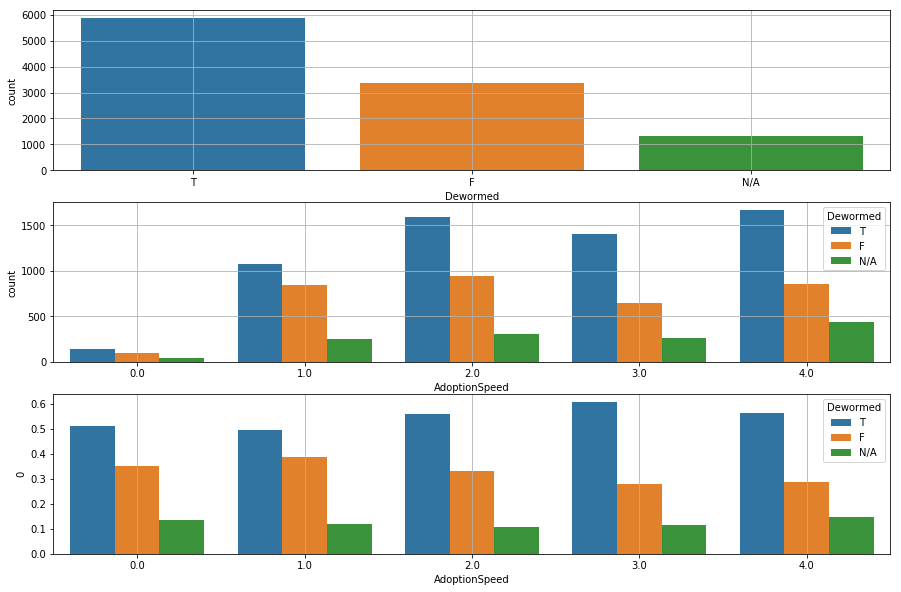

In [30]:
useful_plots(x="Dewormed", data=df_train)

## FurLength

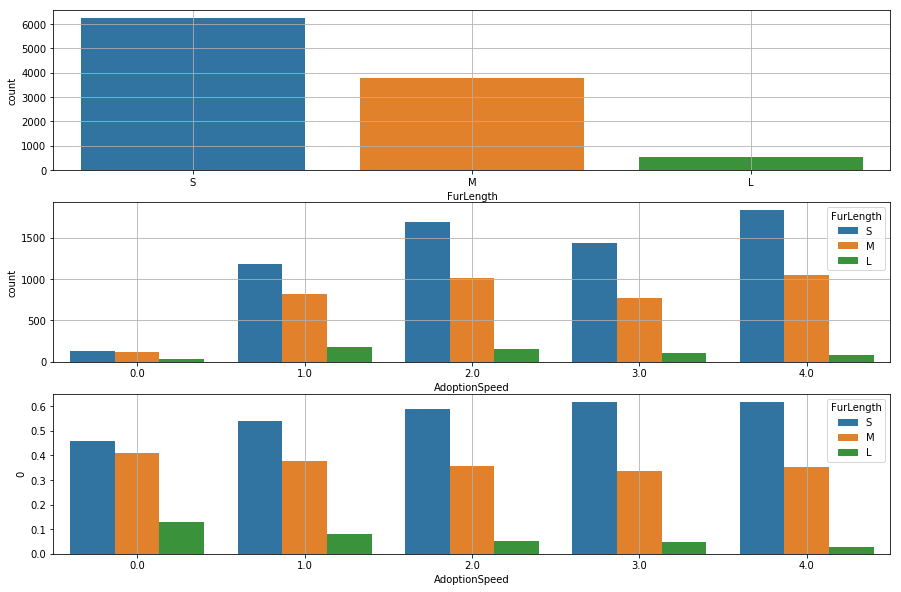

In [31]:
useful_plots(x="FurLength", data=df_train)

## Gender

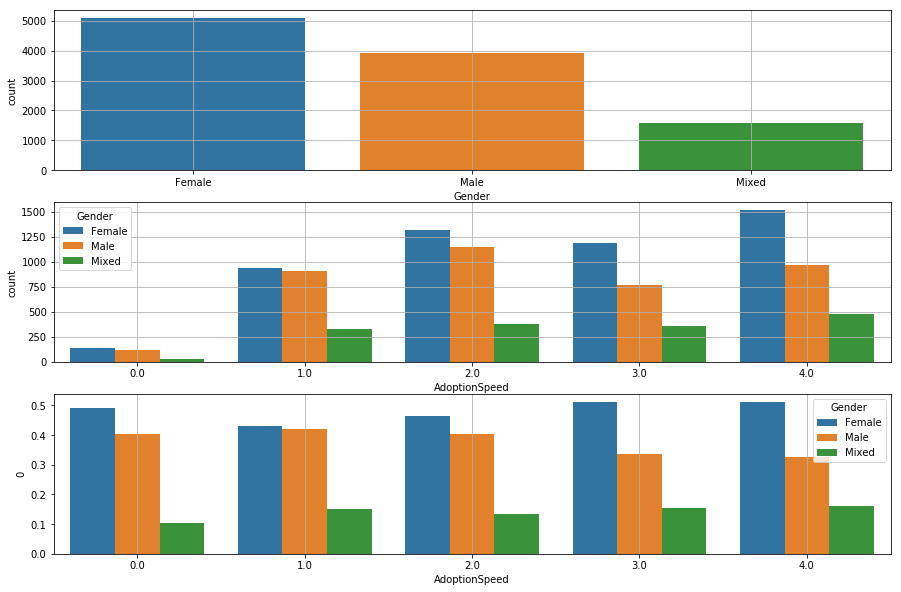

In [32]:
useful_plots(x="Gender", data=df_train)

## Health

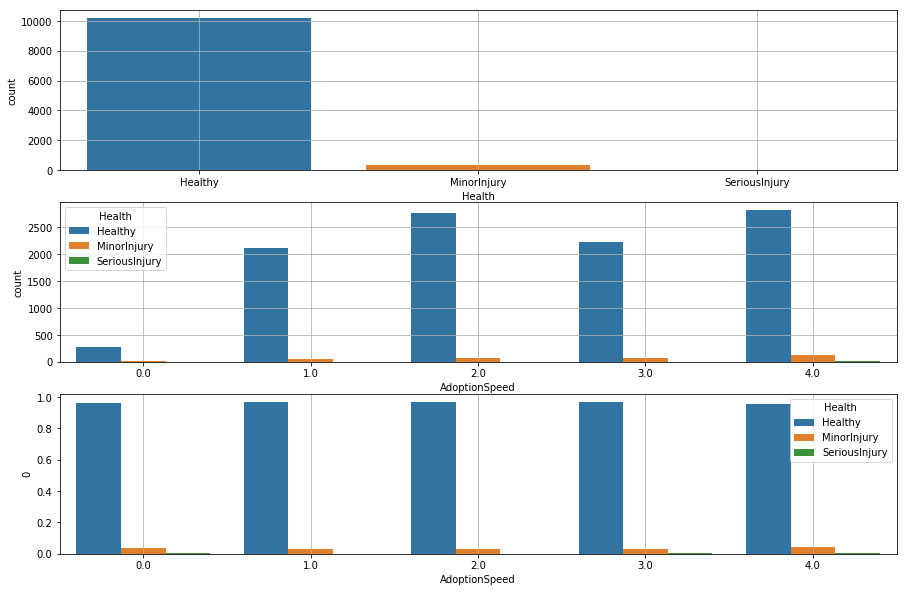

In [33]:
useful_plots(x="Health", data=df_train)

## Maturity Size

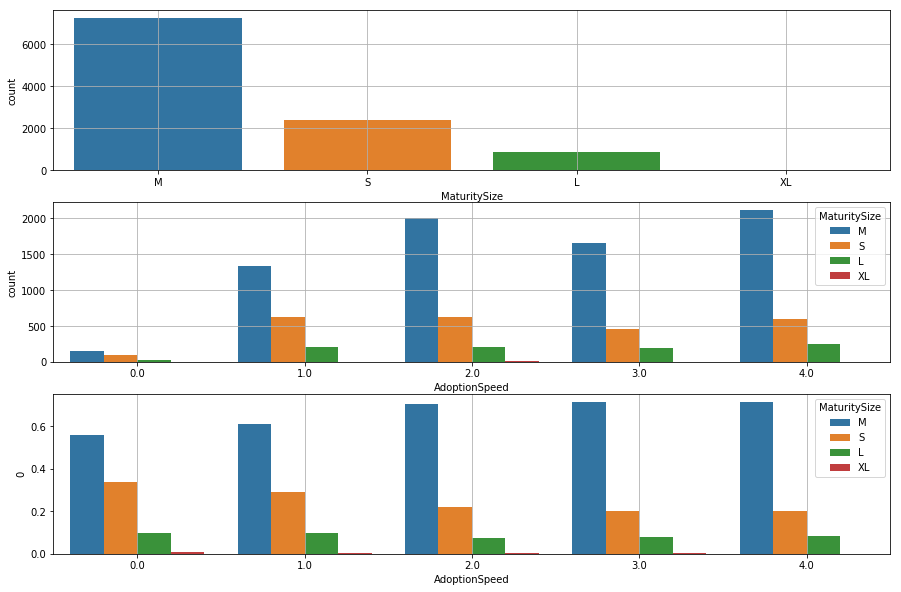

In [34]:
useful_plots(x="MaturitySize", data=df_train)

## Quantity

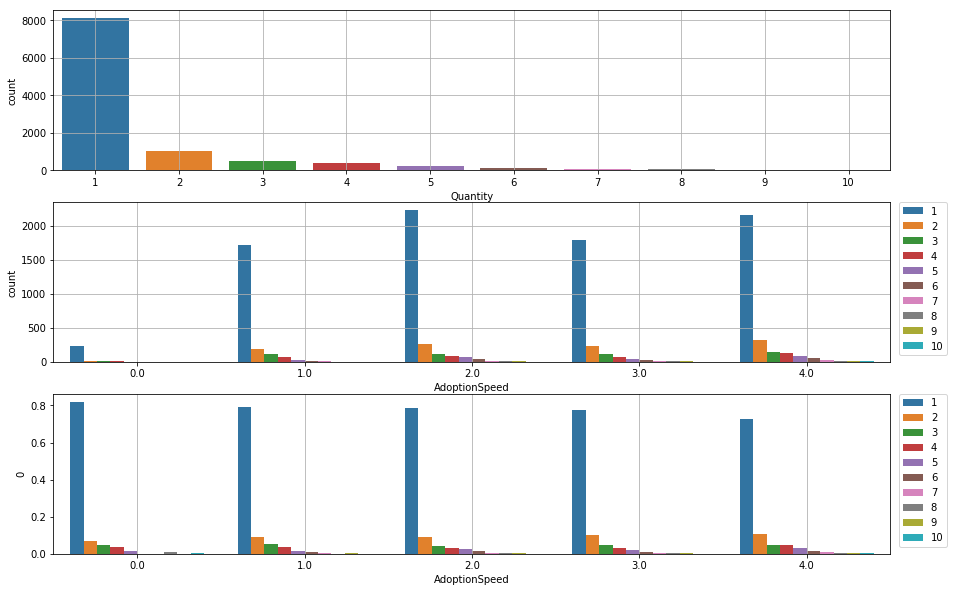

In [35]:
useful_plots(x="Quantity", data=df_train)

## Sterilized

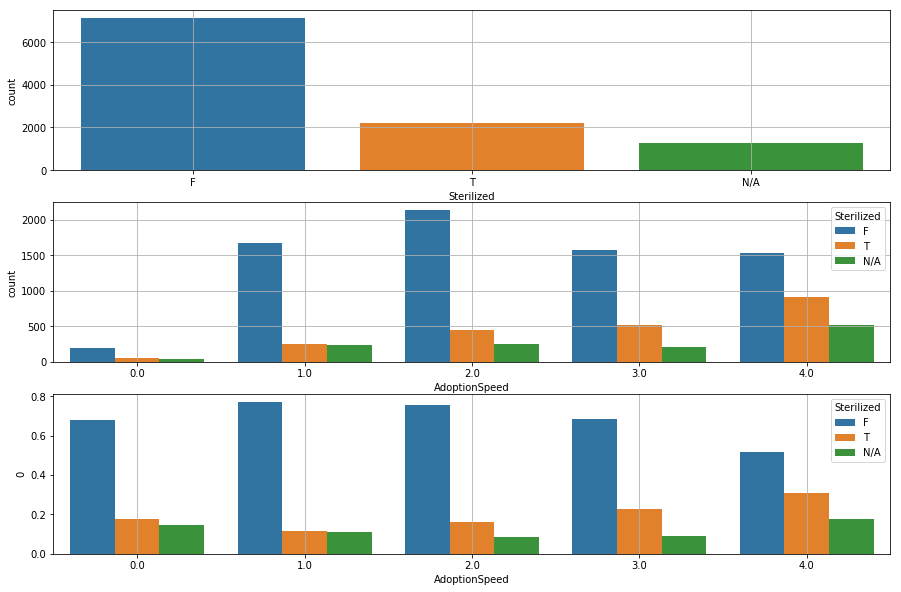

In [36]:
useful_plots(x="Sterilized", data=df_train)

## Vaccinated

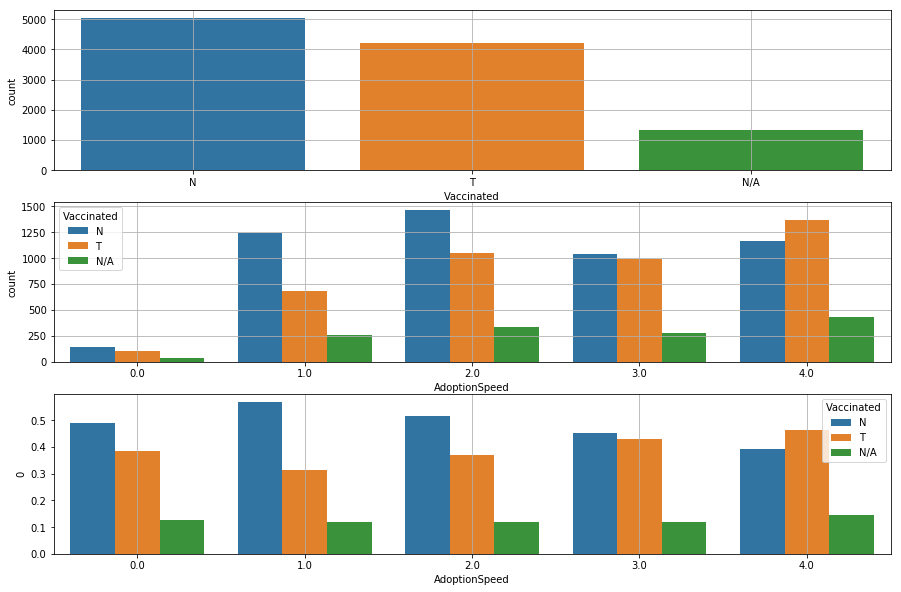

In [37]:
useful_plots(x="Vaccinated", data=df_train)

## Breed

In [38]:
for x,y in df_train["Breed1"].value_counts().items():
    print( x, y)

Mixed Breed 4228
Domestic Short Hair 2579
Domestic Medium Hair 881
Tabby 246
Domestic Long Hair 194
Siamese 191
Labrador Retriever 151
Persian 146
Shih Tzu 130
Poodle 115
Golden Retriever 108
Terrier 101
Calico 75
German Shepherd Dog 66
Beagle 65
American Shorthair 63
Rottweiler 60
Spitz 58
Miniature Pinscher 52
Oriental Short Hair 49
Bengal 47
Schnauzer 44
Doberman Pinscher 42
Jack Russell Terrier 40
Tuxedo 39
Chihuahua 28
Tortoiseshell 28
Husky 27
Dalmatian 27
Cocker Spaniel 25
Maine Coon 23
Dachshund 22
Abyssinian 21
Belgian Shepherd Malinois 21
Siberian Husky 20
British Shorthair 20
Border Collie 20
Pit Bull Terrier 19
Silky Terrier 19
Russian Blue 19
Pomeranian 18
Bobtail 17
Pug 15
Burmese 15
Pekingese 14
Tiger 13
Maltese 13
Oriental Long Hair 12
Singapura 12
Shar Pei 12
Corgi 11
American Curl 11
Hound 10
Bull Terrier 10
Collie 9
Bombay 8
Ragdoll 7
English Cocker Spaniel 7
Bullmastiff 7
Manx 7
Exotic Shorthair 6
Basset Hound 6
Turkish Van 6
Yellow Labrador Retriever 6
Australian K

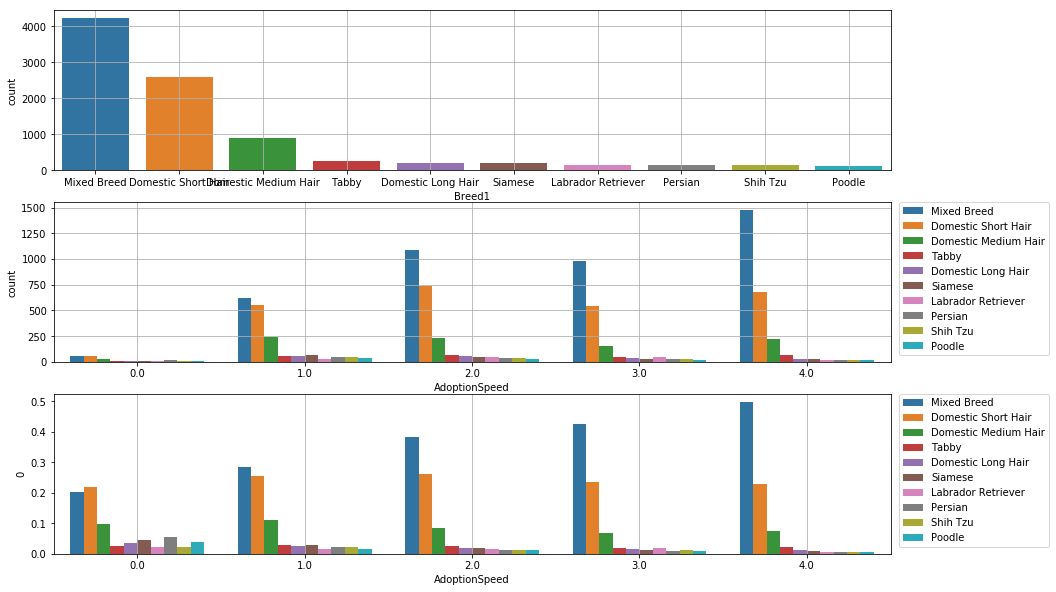

In [39]:
useful_plots(x="Breed1", data=df_train)

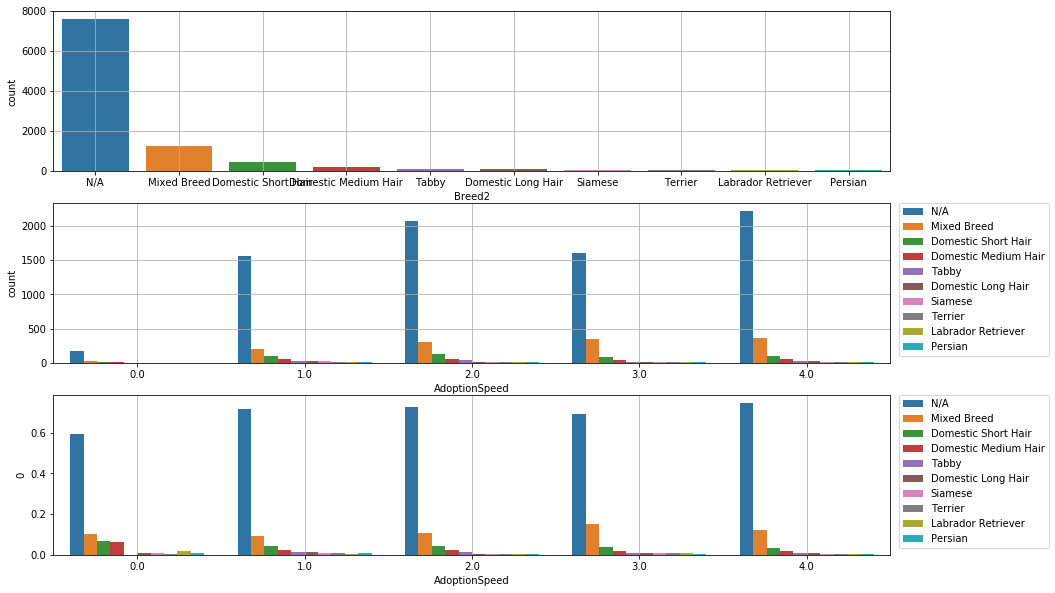

In [40]:
useful_plots(x="Breed2", data=df_train)

## Color

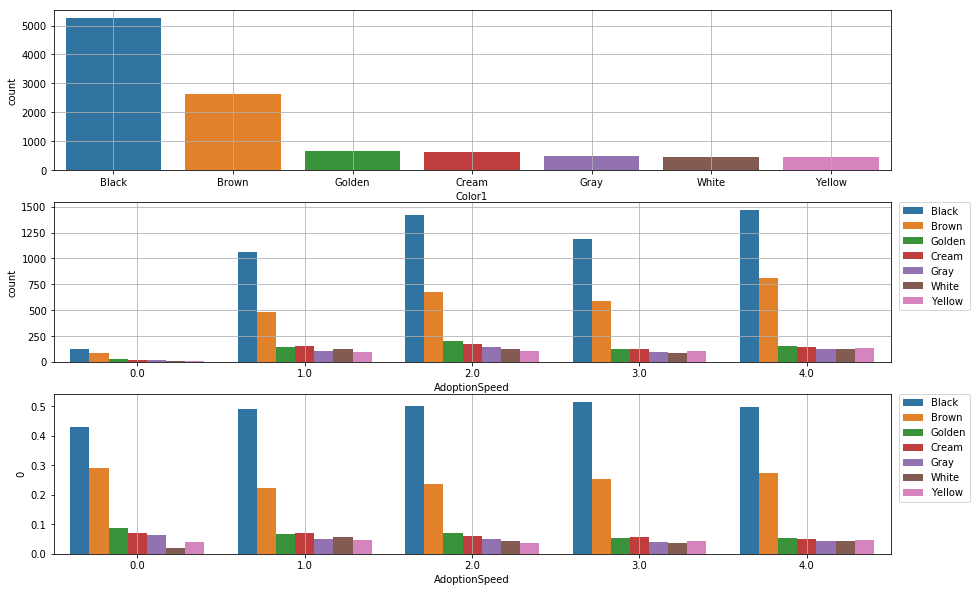

In [41]:
useful_plots(x="Color1", data=df_train)

# Feature Engineering

# Models

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## Train/Validation Split

In [43]:
df_train, df_test = transform_data("data/train.csv", "data/test.csv", get_dummies=True)

/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [44]:
X, y = df_train.drop("AdoptionSpeed", axis=1), df_train["AdoptionSpeed"]
X_test, y_test = df_test.drop("AdoptionSpeed", axis=1), df_test["AdoptionSpeed"]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

## Decision Tree

In [46]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DT


tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 5, 10, 13, 15, 17),
              'min_samples_split':(100, 200, 250, 300, 350, 400)}
tree = DT(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=3, iid=False, n_jobs=4)

# Descarto el ID
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)

# All the result
means = tree_clf.cv_results_['mean_test_score']
stds = tree_clf.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, tree_clf.cv_results_['params']), 
                                key=lambda data: data[0], reverse=True):
    print("%0.4f (+/-%0.04f) para %r" % (mean, std * 2, params))

0.3727 (+/-0.0091) para {'criterion': 'entropy', 'min_samples_leaf': 13, 'min_samples_split': 300}
0.3727 (+/-0.0091) para {'criterion': 'entropy', 'min_samples_leaf': 15, 'min_samples_split': 300}
0.3727 (+/-0.0091) para {'criterion': 'entropy', 'min_samples_leaf': 17, 'min_samples_split': 300}
0.3727 (+/-0.0150) para {'criterion': 'entropy', 'min_samples_leaf': 17, 'min_samples_split': 250}
0.3725 (+/-0.0093) para {'criterion': 'entropy', 'min_samples_leaf': 13, 'min_samples_split': 350}
0.3725 (+/-0.0093) para {'criterion': 'entropy', 'min_samples_leaf': 15, 'min_samples_split': 350}
0.3725 (+/-0.0093) para {'criterion': 'entropy', 'min_samples_leaf': 17, 'min_samples_split': 350}
0.3724 (+/-0.0095) para {'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 300}
0.3724 (+/-0.0100) para {'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 300}
0.3721 (+/-0.0099) para {'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 350}
0.3721 (+/-0

In [48]:
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

Best Decision Tree accuracy:  0.3727314837396758
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=300,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


### Train Score

In [49]:
def print_scores(y, y_pred):
    print("Accuracy: ",accuracy_score(y, y_pred))
    print("-"*80)
    print(classification_report(y, y_pred))
    y_clases = y.unique()
    sns.heatmap(confusion_matrix(y, y_pred),
                #xticklabels=y_clases,
                #yticklabels=y_clases,
                annot=True,
                cmap="jet"
               )
    plt.xlabel("Predicted Class")
    plt.ylabel("Real Class")
    

Accuracy:  0.39994959677419356
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       211
         1.0       0.35      0.38      0.36      1640
         2.0       0.37      0.39      0.38      2153
         3.0       0.35      0.15      0.21      1727
         4.0       0.47      0.66      0.55      2205

   micro avg       0.40      0.40      0.40      7936
   macro avg       0.31      0.32      0.30      7936
weighted avg       0.38      0.40      0.38      7936



/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


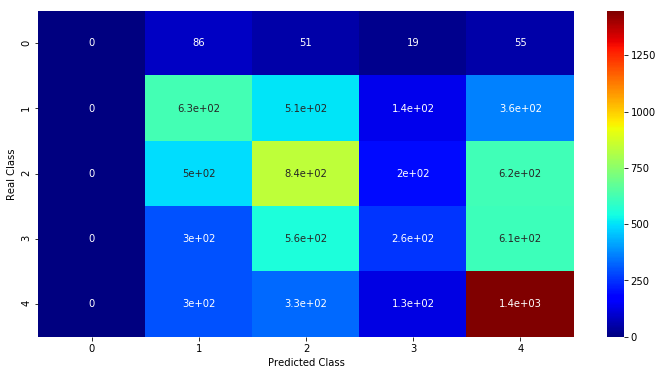

In [50]:
best_tree_clf.fit(X_train.drop(["PID"],axis=1), y_train)
y_train_pred = best_tree_clf.predict(X_train.drop(["PID"],axis=1))
print_scores(y_train, y_train_pred)

### Validation Scores

Accuracy:  0.37339380196523053
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        74
         1.0       0.31      0.33      0.32       537
         2.0       0.33      0.37      0.35       693
         3.0       0.30      0.12      0.17       583
         4.0       0.45      0.64      0.53       759

   micro avg       0.37      0.37      0.37      2646
   macro avg       0.28      0.29      0.27      2646
weighted avg       0.35      0.37      0.35      2646



/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


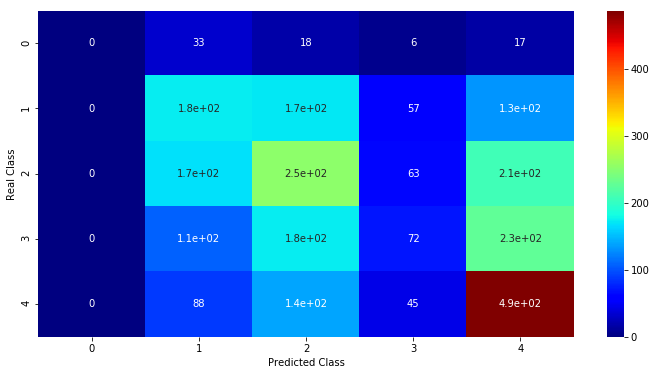

In [51]:
y_valid_pred = best_tree_clf.predict(X_valid.drop(["PID"],axis=1))
print_scores(y_valid, y_valid_pred)

En general ninguna de las clases esta siendo bien detectada

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

In [53]:
sqrt_features = int(sqrt(X_train.shape[1]-1))

rf_param = {"n_estimators": (30, 50, 70, 90, 100),
            'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5),
            'min_samples_split':(20, 50, 100, 200)}
rf = RandomForestClassifier(random_state=42)
rf_clf = GridSearchCV(rf, rf_param, scoring='accuracy', cv=3, iid=False, n_jobs=4)

# Descarto el ID
rf_clf.fit(X_train.drop(["PID"], axis=1), y_train)

# All the result
means = rf_clf.cv_results_['mean_test_score']
stds = rf_clf.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, rf_clf.cv_results_['params']), 
                                key=lambda data: data[0], reverse=True):
    print("%0.4f (+/-%0.04f) para %r" % (mean, std * 2, params))

0.3823 (+/-0.0055) para {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 50, 'n_estimators': 30}
0.3823 (+/-0.0082) para {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 50, 'n_estimators': 90}
0.3818 (+/-0.0114) para {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}
0.3808 (+/-0.0069) para {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 50, 'n_estimators': 50}
0.3807 (+/-0.0045) para {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 50, 'n_estimators': 100}
0.3803 (+/-0.0035) para {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 50, 'n_estimators': 70}
0.3800 (+/-0.0104) para {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 50, 'n_estimators': 70}
0.3799 (+/-0.0141) para {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 90}
0.3795 (+/-0.0034) para {'criterion': 'entropy', 'min_samples_leaf': 1,

In [54]:
best_rf_clf = rf_clf.best_estimator_
print('Best Decision Tree accuracy: ', rf_clf.best_score_)
print(best_rf_clf)
results = results.append({'clf': best_rf_clf, 'best_acc': rf_clf.best_score_}, 
                         ignore_index=True)

Best Decision Tree accuracy:  0.382307306891714
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


### Train Score

Accuracy:  0.5470010080645161
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06       211
         1.0       0.59      0.48      0.53      1640
         2.0       0.50      0.65      0.57      2153
         3.0       0.70      0.26      0.38      1727
         4.0       0.54      0.77      0.63      2205

   micro avg       0.55      0.55      0.55      7936
   macro avg       0.67      0.44      0.43      7936
weighted avg       0.59      0.55      0.52      7936



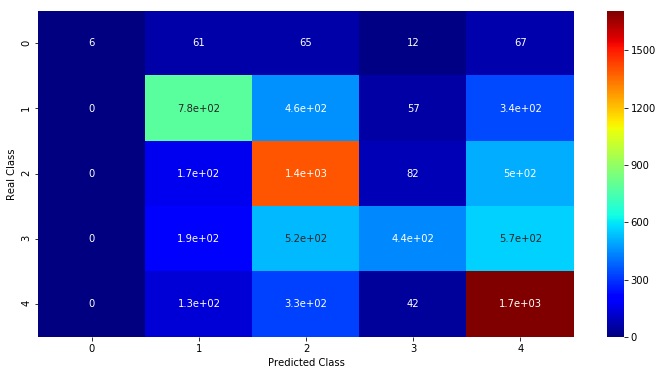

In [70]:
best_rf_clf.fit(X_train.drop(["PID"],axis=1), y_train)
y_train_pred = best_rf_clf.predict(X_train.drop(["PID"],axis=1))
print_scores(y_train, y_train_pred)

### Validation Scores

Accuracy:  0.37188208616780044
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        74
         1.0       0.32      0.24      0.27       537
         2.0       0.32      0.47      0.38       693
         3.0       0.37      0.08      0.13       583
         4.0       0.43      0.64      0.52       759

   micro avg       0.37      0.37      0.37      2646
   macro avg       0.29      0.28      0.26      2646
weighted avg       0.36      0.37      0.33      2646



/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


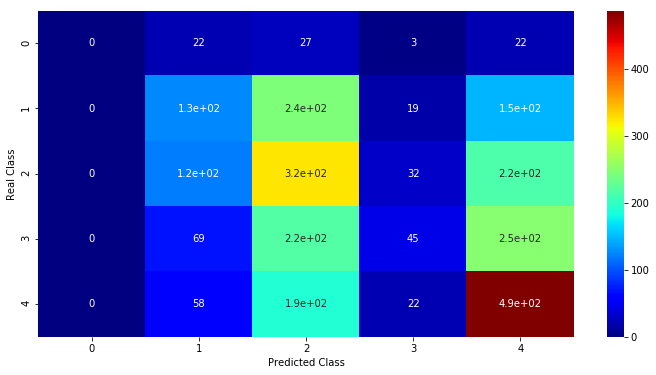

In [71]:
y_valid_pred = best_rf_clf.predict(X_valid.drop(["PID"],axis=1))
print_scores(y_valid, y_valid_pred)

### Submission

In [74]:
df_test.columns

Index(['AdoptionSpeed', 'Age', 'Fee', 'PID', 'Quantity', 'State',
       'Breed1_Abyssinian', 'Breed1_Affenpinscher', 'Breed1_Airedale Terrier',
       'Breed1_Akita',
       ...
       'MaturitySize_S', 'MaturitySize_XL', 'Sterilized_F', 'Sterilized_N/A',
       'Sterilized_T', 'Type_Cat', 'Type_Dog', 'Vaccinated_N',
       'Vaccinated_N/A', 'Vaccinated_T'],
      dtype='object', length=361)

In [76]:
yy = best_rf_clf.predict(df_test.drop(columns=["PID", "AdoptionSpeed"], axis=1))
yy = yy.astype(np.int)

In [79]:
submission = pd.DataFrame(list(zip(df_test.PID, yy)), columns=["PID", "AdoptionSpeed"])
submission.to_csv("data/submission.csv", header=True, index=False)

## Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
naive = GaussianNB()
naive.fit(X_train.drop(["PID"], axis=1), y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

### Train Score

Accuracy:  0.0846774193548387
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.03      1.00      0.06       211
         1.0       0.46      0.10      0.17      1640
         2.0       0.73      0.03      0.06      2153
         3.0       0.47      0.07      0.13      1727
         4.0       0.58      0.04      0.07      2205

   micro avg       0.08      0.08      0.08      7936
   macro avg       0.45      0.25      0.10      7936
weighted avg       0.56      0.08      0.10      7936



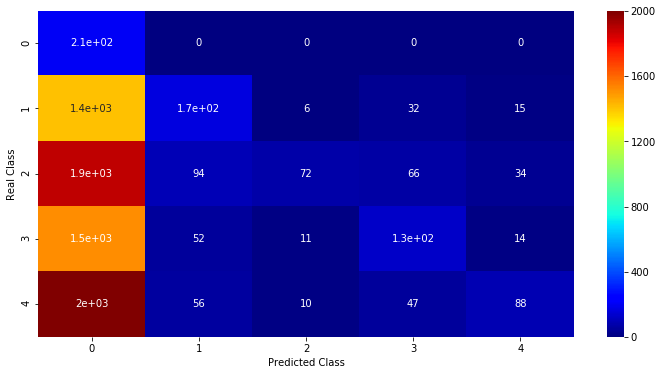

In [59]:
y_train_pred = naive.predict(X_train.drop(["PID"],axis=1))
print_scores(y_train, y_train_pred)

### Validation Scores

Accuracy:  0.05442176870748299
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.03      0.88      0.05        74
         1.0       0.23      0.05      0.08       537
         2.0       0.26      0.01      0.02       693
         3.0       0.32      0.04      0.07       583
         4.0       0.40      0.03      0.05       759

   micro avg       0.05      0.05      0.05      2646
   macro avg       0.25      0.20      0.06      2646
weighted avg       0.30      0.05      0.05      2646



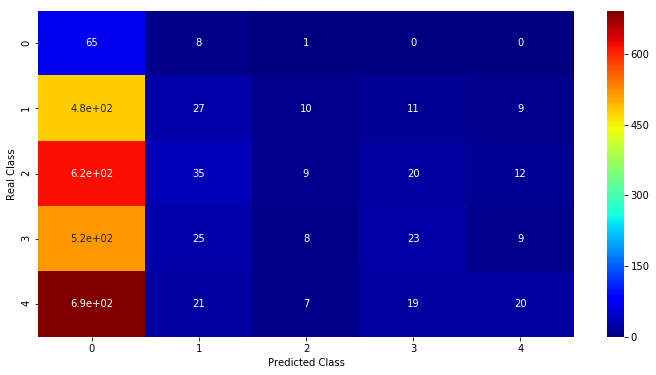

In [60]:
y_valid_pred = naive.predict(X_valid.drop(["PID"],axis=1))
print_scores(y_valid, y_valid_pred)

## SVM

### Preprocessing

In [61]:
from sklearn.decomposition import PCA

In [62]:
for name, tt in zip(X.dtypes.index, X.dtypes.values):
    print(name, tt)

Age float64
Fee float64
PID int64
Quantity float64
State float64
Breed1_Abyssinian uint8
Breed1_Affenpinscher uint8
Breed1_Airedale Terrier uint8
Breed1_Akita uint8
Breed1_American Bulldog uint8
Breed1_American Curl uint8
Breed1_American Shorthair uint8
Breed1_American Staffordshire Terrier uint8
Breed1_American Water Spaniel uint8
Breed1_American Wirehair uint8
Breed1_Applehead Siamese uint8
Breed1_Australian Kelpie uint8
Breed1_Australian Shepherd uint8
Breed1_Australian Terrier uint8
Breed1_Balinese uint8
Breed1_Basenji uint8
Breed1_Basset Hound uint8
Breed1_Beagle uint8
Breed1_Bearded Collie uint8
Breed1_Bedlington Terrier uint8
Breed1_Belgian Shepherd Dog Sheepdog uint8
Breed1_Belgian Shepherd Laekenois uint8
Breed1_Belgian Shepherd Malinois uint8
Breed1_Bengal uint8
Breed1_Birman uint8
Breed1_Black Labrador Retriever uint8
Breed1_Black Mouth Cur uint8
Breed1_Bobtail uint8
Breed1_Bombay uint8
Breed1_Border Collie uint8
Breed1_Boston Terrier uint8
Breed1_Boxer uint8
Breed1_British 

In [63]:
X_train["Breed1_Mixed Breed"].describe()

count    7936.000000
mean        0.395035
std         0.488889
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Breed1_Mixed Breed, dtype: float64

In [64]:
aux = pd.DataFrame(columns=X_train.columns, index=range(X_train.shape[0]))
aux[X_train.columns] = StandardScaler().fit_transform(X_train)

aux["Breed1_Mixed Breed"].describe()

/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


count    7.936000e+03
mean     2.506256e-16
std      1.000063e+00
min     -8.080773e-01
25%     -8.080773e-01
50%     -8.080773e-01
75%      1.237505e+00
max      1.237505e+00
Name: Breed1_Mixed Breed, dtype: float64

In [65]:
num_attr = [name for name, tt in zip(X.dtypes.index, X.dtypes.values) 
            if tt != "uint8"]
#cat_attr = ["ocean_proximity"]

#num_pipeline = Pipeline([
#    ("selector", DataFrameSelector(num_attr)),
#    ("std_scaler", StandardScaler())
#])


### Model

In [66]:
pca = PCA(n_components=10)
pca.fit(X_train)
sum(pca.explained_variance_ratio_)

0.9999998017208044

In [67]:
from sklearn.svm import SVC, LinearSVC

In [68]:
svm_param = {'svm__penalty': ('l1', 'l2'),
             'svm__C': (1e-3, 1e-2, 1e-1, 1),
             "svm__tol": (1e-6, 1e-4, 1e-2)
            # 'gamma': (1e-7, 1e-4),
            # 'tol':(0.001, 0.01, 1e-4)
            }

steps = [("std_scl", StandardScaler()), 
         ("pca", PCA(n_components=10)),
         ("svm", LinearSVC(random_state=42, dual=False))]
linear_svm_pipe = Pipeline(steps=steps)

linear_svm_clf = GridSearchCV(linear_svm_pipe, svm_param, 
                              scoring='accuracy', cv=3, iid=False, n_jobs=4, 
                              verbose=5)

# Descarto el ID
linear_svm_clf.fit(X_train.drop(["PID"], axis=1), y_train)

# All the result
means = linear_svm_clf.cv_results_['mean_test_score']
stds = linear_svm_clf.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, linear_svm_clf.cv_results_['params']), 
                                key=lambda data: data[0], reverse=True):
    print("%0.4f (+/-%0.04f) para %r" % (mean, std * 2, params))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:   17.8s finished
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/franco/anaconda3/envs/dscience/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.3369 (+/-0.0129) para {'svm__C': 0.001, 'svm__penalty': 'l2', 'svm__tol': 0.01}
0.3356 (+/-0.0113) para {'svm__C': 1, 'svm__penalty': 'l2', 'svm__tol': 0.0001}
0.3344 (+/-0.0139) para {'svm__C': 0.001, 'svm__penalty': 'l2', 'svm__tol': 0.0001}
0.3342 (+/-0.0145) para {'svm__C': 0.01, 'svm__penalty': 'l2', 'svm__tol': 0.01}
0.3340 (+/-0.0113) para {'svm__C': 0.001, 'svm__penalty': 'l2', 'svm__tol': 1e-06}
0.3340 (+/-0.0086) para {'svm__C': 1, 'svm__penalty': 'l1', 'svm__tol': 0.0001}
0.3338 (+/-0.0124) para {'svm__C': 0.01, 'svm__penalty': 'l1', 'svm__tol': 0.0001}
0.3337 (+/-0.0120) para {'svm__C': 0.1, 'svm__penalty': 'l2', 'svm__tol': 0.0001}
0.3333 (+/-0.0107) para {'svm__C': 1, 'svm__penalty': 'l1', 'svm__tol': 1e-06}
0.3332 (+/-0.0153) para {'svm__C': 0.1, 'svm__penalty': 'l2', 'svm__tol': 1e-06}
0.3332 (+/-0.0140) para {'svm__C': 1, 'svm__penalty': 'l1', 'svm__tol': 0.01}
0.3328 (+/-0.0099) para {'svm__C': 0.01, 'svm__penalty': 'l1', 'svm__tol': 0.01}
0.3328 (+/-0.0073) para {'

In [69]:
svm_param = {'svm__kernel': ('linear', 'rbf'),
             'svm__C':[1,10,100],
             'svm__gamma':[1,0.1,0.001,0.0001]
            }

steps = [
        ("std_scl", StandardScaler()), 
        ("pca", PCA(n_components=10)),
        ("svm", SVC(random_state=42))]
svm_pipe = Pipeline(steps=steps)

svm_clf = GridSearchCV(svm_pipe, svm_param, scoring='accuracy', cv=3, iid=False, n_jobs=4, 
                       verbose=5)

# Descarto el ID
svm_clf.fit(X_train.drop(["PID"], axis=1), y_train)

# All the result
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, svm_clf.cv_results_['params']), 
                                key=lambda data: data[0], reverse=True):
    print("%0.4f (+/-%0.04f) para %r" % (mean, std * 2, params))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   25.6s


KeyboardInterrupt: 